In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

df = pd.DataFrame([np.random.normal(33500,150000,3700), 
                   np.random.normal(41000,90000,3700), 
                   np.random.normal(41000,120000,3700), 
                   np.random.normal(48000,55000,3700)], 
                  index=[1992,1993,1994,1995])


In [2]:
new_df = pd.DataFrame()
new_df['mean'] = df.mean(axis =1)
new_df['std'] = df.std(axis =1)
new_df['se'] = df.sem(axis= 1)
new_df['C_low'] = new_df['mean'] - 1.96 * new_df['se']
new_df['C_high'] = new_df['mean'] + 1.96 * new_df['se']
new_df

,mean,std,se,C_low,C_high
1992,34671.596916,148801.843862,2446.287244,29876.873918,39466.319914
1993,43601.399501,91525.581257,1504.671287,40652.243778,46550.555224
1994,43451.200741,117995.373725,1939.831995,39649.130032,47253.271451
1995,47258.221879,55838.690223,917.982413,45458.976351,49057.467408


<IPython.core.display.Javascript object>


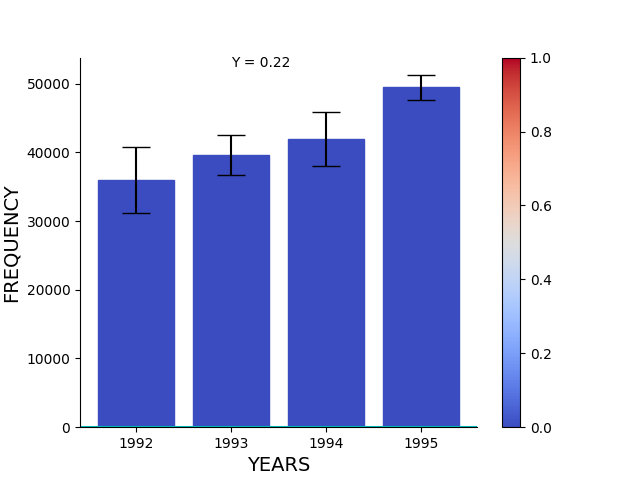

In [24]:
from scipy.stats import norm
import numpy as np
# First, Define a figure
fig = plt.figure()
# next define its the axis and create a plot 
ax = fig.add_subplot(1,1,1)
# change the define your xticks
xticks = np.array(new_df.index,dtype= 'str')
# remove the top and right borders for aesthetic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# draw the bars in the axis
bars = ax.bar(xticks,new_df['mean'].values,
             yerr = (1.96*new_df['se'],1.96*new_df['se']),
             capsize= 10)
# define labels
plt.xlabel('YEARS',size = 14)
plt.ylabel('FREQUENCY',size = 14)
# Define color map
cmap = plt.cm.get_cmap('coolwarm')
# define scalar mappable 
sm = plt.cm.ScalarMappable(cmap = cmap)
# draw the color bar
cbar = plt.colorbar(cmap = cmap, mappable =sm)
# define norm (will be used later to turn y to a value from 0 to 1 )

# define the the cursor class and its events
class Cursor(object):
    def __init__(self,ax):
        self.ax = ax
        self.lx = ax.axhline(color = 'c')
        self.txt = ax.text(1,50000,'')
    def mouse_movemnt(self,event):
        #behaviour outside of the plot
        if not event.inaxes:
            return
        #behavior inside the plot
        y = event.ydata
        self.lx.set_ydata(y)
        
        for idx,bar in zip(new_df.index, bars):
            norm = plt.Normalize(vmin =-1,vmax = 1)
            mean = new_df.loc[idx,'mean']
            err = new_df.loc[idx, 'se']
            self.txt.set_text(f'Y = {round(y,2)} \n')
            color_prob = norm( (-mean + y)/(err*1.96)) # if you re wondering where did this come from and why
                                                       # vmin and vmax are set to those values , scroll down
            #color_prob = norm.cdf(y,loc = mean, scale = err) # you can also use this 
            bar.set_color(cmap(color_prob))
            
        

# connect the events to the plot
cursor = Cursor(ax)
plt.connect('motion_notify_event', cursor.mouse_movemnt)
None

# explaining the normalization thingy

first for the interval of confidence for 95% nominal coverage probability, we have the formula :
$$mean \pm 1.96 \times SE $$

let's set y equal to that range

$$ y = mean \pm 1.96 \times SE $$
Then, $$ y - mean = \pm 1.96 \times SE $$
And finally,
$$ \frac{y - mean}{SE} =  \pm 1.96  $$
so,
$$ \forall x \in y, f(x) = \frac{ x - mean }{SE} \in [-1.96,1.96]  $$
i.e, for all values within that confidence interval, the function $ f(x) $ will spit out a value within the range $[-1.96,1.96]$